In [23]:
import pandas as pd
import json
import ast
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("sellers.csv")

In [5]:
df.count()

uuid                  335
name                  335
description           333
ratings               335
business_name         335
business_address      334
ratings_statistics    322
is_pro                335
just_launched         335
seller_type            16
country_code          334
dtype: int64

In [4]:
#: remove duplicates by seller_id
df = df.drop_duplicates(subset='uuid')

In [7]:
df.head()

,uuid,name,description,ratings,business_name,business_address,ratings_statistics,is_pro,just_launched,seller_type,country_code
0,A3FPSB713N5Z2P,Fire buissness,Fire buissness is committed to providing each ...,[],Ldya Dibeculu,4092 Poplar Ave\nCONCORD\nCA\n94521\nUS,NaN,False,True,mid,US
1,A1XEOW9O1TOWF5,ADI GLOBAL STORE US,ADI GLOBAL STORE US is committed to providing ...,[],eFitness a.s.,Za Strahovem 2338/44a\nPraha 6\nBrevnov\n16900...,NaN,True,True,mid,CZ
2,A1UT6ABTQ5NORN,QTZ ONLINESHOP,QTZ ONLINESHOP is committed to providing each ...,[],Toretto Fit LLC,27538 Desert Willow Way\nwesley chapel\nfl\n33...,"{'raw': {'star2Count': 17, 'star5Count': 124, ...",True,False,mid,US
3,A2PSQVK2Y4WP4T,2stopshop,2stopshop is committed to providing each custo...,[],Nhan Vo,3 mercier ave\nBoston\nMA\nMA\n02123\nUS,"{'raw': {'star2Count': 0, 'star5Count': 2, 'ra...",False,False,mid,US
4,A1OKP98L4EA109,DEKA'S STORE,DEKA'S STORE is committed to providing each cu...,[],Karla Panait,12626 Nelson st\nApt 10\nGARDEN GROVE\nCA\n928...,NaN,False,True,mid,US


In [11]:
with_ratings_df = df[df['ratings_statistics'].isna() == False]

In [18]:
with_ratings_df['ratings_statistics'] = with_ratings_df['ratings_statistics'].apply(lambda x: ast.literal_eval(x))

/var/folders/97/c41p3nk52bz71ss090v60d6h0000gn/T/ipykernel_7509/1809014694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_ratings_df['ratings_statistics'] = with_ratings_df['ratings_statistics'].apply(lambda x: ast.literal_eval(x))


In [20]:
with_ratings_df['positive_percentage'] = with_ratings_df['ratings_statistics'].apply(lambda x: x['positive_percentage'])

/var/folders/97/c41p3nk52bz71ss090v60d6h0000gn/T/ipykernel_7509/770045137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_ratings_df['positive_percentage'] = with_ratings_df['ratings_statistics'].apply(lambda x: x['positive_percentage'])


In [22]:
with_ratings_df.head()

,uuid,name,description,ratings,business_name,business_address,ratings_statistics,is_pro,just_launched,seller_type,country_code,last_12_months_positive_reviews,positive_percentage
2,A1UT6ABTQ5NORN,QTZ ONLINESHOP,QTZ ONLINESHOP is committed to providing each ...,[],Toretto Fit LLC,27538 Desert Willow Way\nwesley chapel\nfl\n33...,"{'raw': {'star2Count': 17, 'star5Count': 124, ...",True,False,mid,US,None,43
3,A2PSQVK2Y4WP4T,2stopshop,2stopshop is committed to providing each custo...,[],Nhan Vo,3 mercier ave\nBoston\nMA\nMA\n02123\nUS,"{'raw': {'star2Count': 0, 'star5Count': 2, 'ra...",False,False,mid,US,None,67
5,A1V7CXJ5T4H8KJ,Cheap-AF,Cheap-AF is committed to providing each custom...,[],Bavly Samuel,2219 Viking CT\nMURFREESBORO\nTN\n37127\nUS,"{'raw': {'star2Count': 1, 'star5Count': 2, 'ra...",True,False,mid,US,None,57
7,A26S4628PAN4YB,R&S Sellers LLC,R&S Sellers LLC is committed to providing each...,[],R&S Sellers LLC,295 Milky Way Drive\nPULASKI\nTN\n38478\nUS,"{'raw': {'star2Count': 0, 'star5Count': 81, 'r...",True,False,good,US,None,97
8,A3B84DDAMEK1NP,Keranique,What Is In Keranique? Keranique® was created e...,[],Profectus Beauty LLC,"111 Town Square Place\n11th Floor, Suite 1130\...","{'raw': {'star2Count': 27, 'star5Count': 7263,...",True,False,good,US,None,100


(array([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 3., 4.]),
 array([ 50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,
         72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,
         95. ,  97.5, 100. ]),
 <BarContainer object of 20 artists>)

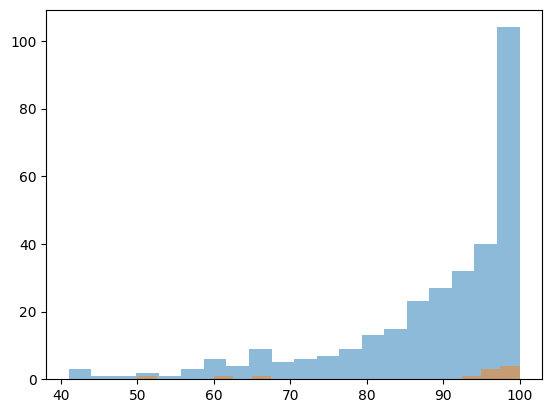

In [27]:
#: I want to see if people who are not pro have lower positive percentages than people who are pro, please plot this

pro_df = with_ratings_df[with_ratings_df['is_pro'] == True]
non_pro_df = with_ratings_df[with_ratings_df['is_pro'] == False]

plt.hist(pro_df['positive_percentage'], bins=20, alpha=0.5, label='pro')
plt.hist(non_pro_df['positive_percentage'], bins=20, alpha=0.5, label='non-pro')

In [30]:
non_pro_df['positive_percentage'].median()

np.float64(96.0)

In [31]:
pro_df['positive_percentage'].median()

np.float64(93.0)

In [35]:
with_address_and_ratings_df = with_ratings_df[with_ratings_df['business_address'].isna() == False]

In [38]:
with_address_and_ratings_df["address_one"] = with_address_and_ratings_df['business_address'].apply(lambda x: x.split("\n")[0])

/var/folders/97/c41p3nk52bz71ss090v60d6h0000gn/T/ipykernel_7509/2559903784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_address_and_ratings_df["address_one"] = with_address_and_ratings_df['business_address'].apply(lambda x: x.split("\n")[0])


In [39]:
with_address_and_ratings_df.head()

,uuid,name,description,ratings,business_name,business_address,ratings_statistics,is_pro,just_launched,seller_type,country_code,last_12_months_positive_reviews,positive_percentage,address_one
2,A1UT6ABTQ5NORN,QTZ ONLINESHOP,QTZ ONLINESHOP is committed to providing each customer with the highest standard of customer service.,[],Toretto Fit LLC,27538 Desert Willow Way\nwesley chapel\nfl\n33544\nUS,"{'raw': {'star2Count': 17, 'star5Count': 124, 'ratingCountWithText': 274, 'star4': 4, 'star5': 45, 'star5CountWithText': 123, 'star2': 6, 'star3Count': 14, 'star1Count': 112, 'star3': 5, 'ratingCount': 277, 'star1': 40, 'star4Count': 10, 'star4CountWithText': 9, 'star3CountWithText': 14, 'star1CountWithText': 111, 'star2CountWithText': 17}, 'total_ratings': 277, 'positive_percentage': 43, 'stars': 3.0}",True,False,mid,US,None,43,27538 Desert Willow Way
3,A2PSQVK2Y4WP4T,2stopshop,2stopshop is committed to providing each customer with the highest standard of customer service.,[],Nhan Vo,3 mercier ave\nBoston\nMA\nMA\n02123\nUS,"{'raw': {'star2Count': 0, 'star5Count': 2, 'ratingCountWithText': 3, 'star4': 0, 'star5': 67, 'star5CountWithText': 2, 'star2': 0, 'star3Count': 0, 'star1Count': 1, 'star3': 0, 'ratingCount': 3, 'star1': 33, 'star4Count': 0, 'star4CountWithText': 0, 'star3CountWithText': 0, 'star1CountWithText': 1, 'star2CountWithText': 0}, 'total_ratings': 3, 'positive_percentage': 67, 'stars': 3.5}",False,False,mid,US,None,67,3 mercier ave
5,A1V7CXJ5T4H8KJ,Cheap-AF,Cheap-AF is committed to providing each customer with the highest standard of customer service.,[],Bavly Samuel,2219 Viking CT\nMURFREESBORO\nTN\n37127\nUS,"{'raw': {'star2Count': 1, 'star5Count': 2, 'ratingCountWithText': 7, 'star4': 29, 'star5': 29, 'star5CountWithText': 2, 'star2': 14, 'star3Count': 1, 'star1Count': 1, 'star3': 14, 'ratingCount': 7, 'star1': 14, 'star4Count': 2, 'star4CountWithText': 2, 'star3CountWithText': 1, 'star1CountWithText': 1, 'star2CountWithText': 1}, 'total_ratings': 7, 'positive_percentage': 57, 'stars': 3.5}",True,False,mid,US,None,57,2219 Viking CT
7,A26S4628PAN4YB,R&S Sellers LLC,R&S Sellers LLC is committed to providing each customer with the highest standard of customer service.,[],R&S Sellers LLC,295 Milky Way Drive\nPULASKI\nTN\n38478\nUS,"{'raw': {'star2Count': 0, 'star5Count': 81, 'ratingCountWithText': 91, 'star4': 10, 'star5': 88, 'star5CountWithText': 80, 'star2': 0, 'star3Count': 0, 'star1Count': 2, 'star3': 0, 'ratingCount': 92, 'star1': 2, 'star4Count': 9, 'star4CountWithText': 9, 'star3CountWithText': 0, 'star1CountWithText': 2, 'star2CountWithText': 0}, 'total_ratings': 92, 'positive_percentage': 97, 'stars': 5.0}",True,False,good,US,None,97,295 Milky Way Drive
8,A3B84DDAMEK1NP,Keranique,"What Is In Keranique? Keranique® was created exclusively for women who know how difficult is to live with the effects of hair loss and want to fight back. Clinically Proven Keranique® Hair Regrowth Treatment is designed for women’s unique hair needs and contains Minoxidil for Women, the only FDA Approved Ingredient for Real Hair Regrowth for women. What products are in the Keranique® Hair Regrowth System? \nKeranique® Scalp Stimulating Shampoo\nKeranique® Volumizing Conditioner\n Keranique® Hair Reg...\nWhat Is In Keranique?\nKeranique® was created exclusively for women who know how difficult is to live with the effects of hair loss and want to fight back. Clinically Proven Keranique® Hair Regrowth Treatment is designed for women’s unique hair needs and contains Minoxidil for Women, the only FDA Approved Ingredient for Real Hair Regrowth for women. \r\n \nWhat products are in the Keranique® Hair Regrowth System?\nKeranique® Scalp Stimulating ShampooKeranique® Volumizing ConditionerKeranique® Hair Regrowth TreatmentKeranique® Lift & Repair Treatment\nWhat Is In Keranique Vitamins?\nKeranique Daily Essentials contains Biotin, and is formulated to support the Keranique Hair Regrowth System to help grow thicker fuller hair. These ingredien

In [40]:
with_lowercase_df = with_address_and_ratings_df[with_address_and_ratings_df['address_one'].str.islower() == True]

In [41]:
without_lowercase_df = with_address_and_ratings_df[with_address_and_ratings_df['address_one'].str.islower() == False]

In [42]:
with_lowercase_df['positive_percentage'].mean()

np.float64(83.85714285714286)

In [43]:
without_lowercase_df['positive_percentage'].mean()

np.float64(89.23)

In [44]:
with_lowercase_names_df = with_ratings_df[with_ratings_df['name'].str.islower() == True]
without_lowercase_names_df = with_ratings_df[with_ratings_df['name'].str.islower() == False]

In [45]:
with_lowercase_names_df['positive_percentage'].mean()

np.float64(88.3529411764706)

In [46]:
without_lowercase_names_df['positive_percentage'].mean()

np.float64(88.9311475409836)

In [47]:
#: check if there is a correlation between positive percentage and having a default vs non default description

with_description_df = with_ratings_df[with_ratings_df['description'].isna() == False]
has_default_description_df = with_description_df[with_description_df['description'].str.contains("is committed to providing each customer with the highest standard of customer service.")]
no_default_description_df = with_description_df[with_description_df['description'].str.contains("is committed to providing each customer with the highest standard of customer service.") == False]

In [48]:
has_default_description_df['positive_percentage'].mean()

np.float64(90.38659793814433)

In [49]:
no_default_description_df['positive_percentage'].mean()

np.float64(86.92857142857143)